# Importing Data and modules in python

In [54]:

#!pip install --user statsmodels
#(for smote sampling if there is no package available, run this line by uncommenting)

#!pip install --user imblearn
import sys
#sys.path.append("./.local/lib/python3.5/site-packages")
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import recall_score,accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import numpy as np
from collections import Counter
plt.rcParams["figure.figsize"] = (10,10)


# Link for the data along with the code book:
# https://www.icpsr.umich.edu/icpsrweb/ICPSR/studies/34565/datadocumentation

# Cleaning the data

In [3]:
df = pd.read_csv('raw_data.csv') 
data=df[['CASEID', 'AGECAT', 'SEX', 'RACE', 'CASETYPE','ALCOHOL']]
data=data[data.SEX!=-8] ##According to dataset's codebook "-8" are unknown values. Hence, removing it
data=data.rename(index=str, columns={"CASEID": "id", "AGECAT":"age", "SEX":"gender", "RACE":"race", "CASETYPE":"suicide", 
                                "ALCOHOL":"alcohol_use"})

In [4]:
print(data.isnull().sum())
#drop race
data.drop("race", axis=1, inplace=True)
#replace non-suicide casetype with 0 i.e., from 2 to 8
data['suicide'].replace(to_replace=[1,2,3,4,5,6,7,8], value=[1,0,0,0,0,0,0,0], inplace=True)
len(data)
#gender encoding (0=male, 1=female)
data['gender'].replace(to_replace=[1,2], value=[0,1], inplace=True)
data.head()

id             0
age            0
gender         0
race           0
suicide        0
alcohol_use    0
dtype: int64


,id,age,gender,suicide,alcohol_use
0,1,4,0,0,1
1,2,11,0,0,0
2,3,11,1,0,0
3,4,2,0,0,0
4,5,6,0,0,1


In [6]:
#### Non dummied data
data1=data[['age','gender', 'alcohol_use', 'suicide']]
data_x=data1.iloc[:,0:3]
data_y=data1.iloc[:,-1]
# splitting non dummied data to train and test samples
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=0)

# Normalization: There are no conitnuous variables. But creating dummies of categorical data to bring them on same scale.
# Splitting data in to train and test set

In [7]:
#dummies
final_data=pd.get_dummies(data, columns=['age'])
model_data=final_data[['gender', 'alcohol_use', 'age_3', 'age_4', 'age_5', 'age_6','age_7', 'age_8', 'age_9', 'age_10', 'age_11','suicide']]
## Renaming age column names appropriately
age_labels={'age_3':'age_12-17', 'age_4':'age_18-20', 'age_5':'age_21-24', 'age_6':'age_25-29', 'age_7':'age_30-34', 
                    'age_8':'age_35-44', 'age_9':'age_45-54', 'age_10':'age_55-64', 'age_11':'age_>65'}
model_data=model_data.rename(index=str, columns=age_labels)
mod_x=model_data.iloc[:, 0:11]
mod_y=model_data.iloc[:, -1]
#splitting the data in to train and test samples
X_train,X_test, y_train,y_test = train_test_split(mod_x, mod_y, test_size=0.3, random_state=0)

# Descriptive Statistics and Data Visualizations                    

In [8]:
#descriptive stats of entire dataset
#model_data.describe()
model_data.describe()

,gender,alcohol_use,age_12-17,age_18-20,age_21-24,age_25-29,age_30-34,age_35-44,age_45-54,age_55-64,age_>65,suicide
count,229141.000000,229141.000000,229141.000000,229141.000000,229141.000000,229141.000000,229141.000000,229141.000000,229141.000000,229141.000000,229141.000000,229141.000000
mean,0.480185,0.197368,0.052042,0.074269,0.079702,0.096155,0.087038,0.161067,0.173666,0.103988,0.124482,0.039399
std,0.499608,0.398013,0.222113,0.262208,0.270832,0.294804,0.281892,0.367593,0.378823,0.305246,0.330132,0.194544
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Univariate analysis 

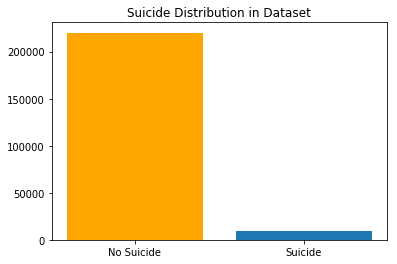

Plot shows that the dataset is higly imbalanced i.e, no-suicide cases around 96% compared to suicide cases i.e., 4%


In [10]:
#male vs female
suicide =[]
i = 0
for i in range(0, len(data)):
    if data['suicide'][i] == 0:
        suicide.append("No Suicide")
    elif data['suicide'][i] == 1:
        suicide.append("Suicide")
        
D = Counter(suicide)
bar_alcohol = plt.bar(range(len(D)), list(D.values()), align='center')
bar_alcohol[0].set_color('orange')
plt.xticks(range(len(D)), list(D.keys()))
plt.title("Suicide Distribution in Dataset")
plt.show()
print("Plot shows that the dataset is higly imbalanced i.e, no-suicide cases around 96% compared to suicide cases i.e., 4%")

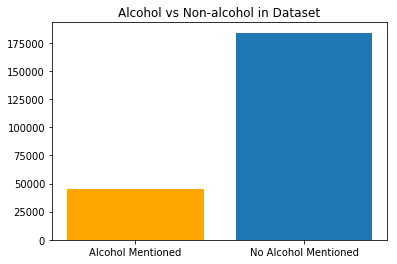

Individuals with no-alcohol use are more i.e., around 86% compared to alcohol use individuals in the dataset


In [11]:
#alcolhol vs non-alcohol mentioned
alcohol =[]
i = 0
for i in range(0, len(data)):
    if data['alcohol_use'][i] == 0:
        alcohol.append("No Alcohol Mentioned")
    elif data['alcohol_use'][i] == 1:
        alcohol.append("Alcohol Mentioned")
        
D = Counter(alcohol)
bar_alcohol = plt.bar(range(len(D)), list(D.values()), align='center')
bar_alcohol[0].set_color('orange')
plt.xticks(range(len(D)), list(D.keys()))
plt.title("Alcohol vs Non-alcohol in Dataset")
plt.show()
print("Individuals with no-alcohol use are more i.e., around 86% compared to alcohol use individuals in the dataset")

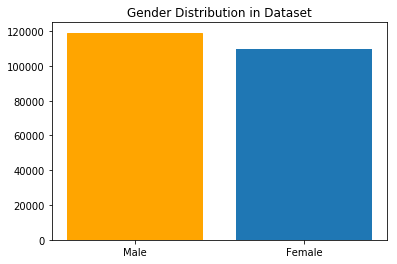

Number of males are higher in the dataset


In [12]:
#male vs female
gender =[]
i = 0
for i in range(0, len(data)):
    if data['gender'][i] == 0:
        gender.append("Male")
    elif data['gender'][i] == 1:
        gender.append("Female")
        
D = Counter(gender)
bar_alcohol = plt.bar(range(len(D)), list(D.values()), align='center')
bar_alcohol[0].set_color('orange')
plt.xticks(range(len(D)), list(D.keys()))
plt.title("Gender Distribution in Dataset")
plt.show()
print("Number of males are higher in the dataset")

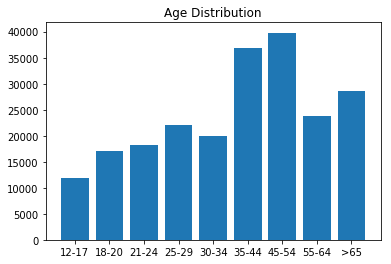

The number of individuals in the age of 35-44 and 45-54 are higher than other age groups


In [13]:
#age distribution
age=[]

for i in data['age']:    
    if i == 3:
        age.append("12-17")
        
    elif i == 4:
        age.append("18-20")
       
    elif i == 5:
        age.append("21-24")
       
    elif i == 6:
        age.append("25-29")
   
    elif i == 7:
        age.append("30-34")
  
    elif i == 8:
        age.append("35-44")
       
    elif i == 9:
        age.append("45-54")
        
    elif i == 10:
        age.append("55-64")
        
    elif i == 11:
        age.append(">65")
        
from collections import OrderedDict
D = Counter(age)
D1 = OrderedDict(sorted(D.items()))
plt.bar(range(len(D1)), list(D1.values()), align='center')
plt.xticks(range(len(D1)), list(D1.keys()))
plt.title("Age Distribution")
plt.show()
print("The number of individuals in the age of 35-44 and 45-54 are higher than other age groups")

# Bivariate analysis (suicide cases vs alcohol use)

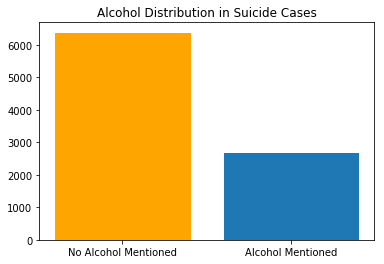

Plot shows there are more suicide cases in the individuals with no alcohol use which is not true
Reason is, as seen above the non-alcohol individuals in dataset are more i.e., around 86% than alcohol use individuals


In [14]:
suicide =[]
i = 0
for i in range(0, len(data)):
    if data['alcohol_use'][i] == 0 and data['suicide'][i] == 1:
        suicide.append("No Alcohol Mentioned")
    elif data['alcohol_use'][i] == 1 and data['suicide'][i] == 1:
        suicide.append("Alcohol Mentioned")
        
D = Counter(suicide)
bar_alcohol = plt.bar(range(len(D)), list(D.values()), align='center')
bar_alcohol[0].set_color('orange')
plt.xticks(range(len(D)), list(D.keys()))
plt.title("Alcohol Distribution in Suicide Cases")
plt.show()
print("Plot shows there are more suicide cases in the individuals with no alcohol use which is not true")
print("Reason is, as seen above the non-alcohol individuals in dataset are more i.e., around 86% than alcohol use individuals")

# Gender vs suicide cases

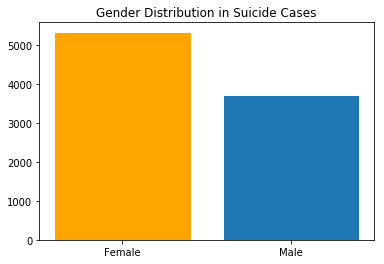

The number of suicide cases are more among females


In [15]:
#gender category stats: 0 is male, 1 is female
#print('mean: ', np.mean(data['gender']))
#print('median: ', np.median(data['gender']))
#print('variance: ', np.var(data['gender']))
#print('standard deviation: ', np.std(data['gender']))

gender_suicide =[]
gender_nosuicide =[]
i = 0
while i < len(data):
    if data['suicide'][i] == 1:
        gender_suicide.append(data['gender'][i])
        i +=1
    else:
        gender_nosuicide.append(data['gender'][i])
        i += 1
gender_suicide1 = []
for i in gender_suicide:
    if i == 0:
        gender_suicide1.append("Male")
    else: 
        gender_suicide1.append("Female")
        
D = Counter(gender_suicide1)
bar_alcohol = plt.bar(range(len(D)), list(D.values()), align='center')
bar_alcohol[0].set_color('orange')
plt.xticks(range(len(D)), list(D.keys()))
plt.title("Gender Distribution in Suicide Cases")
plt.show()
print("The number of suicide cases are more among females")

# Age categories vs suicide case

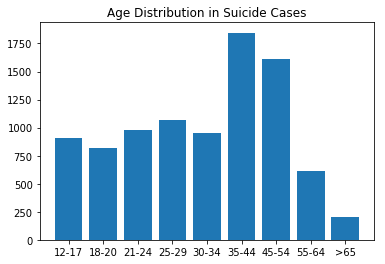

The number of individuals are high in age range of 35-54, so it appears there are more suicides whereas other age groups also have more suicide rates except age 65


In [17]:
age_suicide =[]
i = 0
while i < len(data):
    if data['suicide'][i] == 1:
        age_suicide.append(data['age'][i])
        i +=1
    else:
        i +=1
        
age_suicide1 =[]
for i in age_suicide:    
    if i == 3:
        age_suicide1.append("12-17")
        
    elif i == 4:
        age_suicide1.append("18-20")
       
    elif i == 5:
        age_suicide1.append("21-24")
       
    elif i == 6:
        age_suicide1.append("25-29")
   
    elif i == 7:
        age_suicide1.append("30-34")
  
    elif i == 8:
        age_suicide1.append("35-44")
       
    elif i == 9:
        age_suicide1.append("45-54")
        
    elif i == 10:
        age_suicide1.append("55-64")
        
    elif i == 11:
        age_suicide1.append(">65")
        
from collections import OrderedDict
D = Counter(age_suicide1)
D1 = OrderedDict(sorted(D.items()))
plt.bar(range(len(D1)), list(D1.values()), align='center')
plt.xticks(range(len(D1)), list(D1.keys()))
plt.title("Age Distribution in Suicide Cases")
plt.show()
print("The number of individuals are high in age range of 35-54, so it appears there are more suicides whereas other age \
groups also have more suicide rates except age 65")

# Correlation between variables to check for multicollinearity problem and strength of relationship among independant variables and target variable(suicide cases)

Heat map shows that there is a weak correlation between indepedant variables. Hence, no multicollinearity problem
But there is weak correlation between independant and target variable which might affect our logistic model


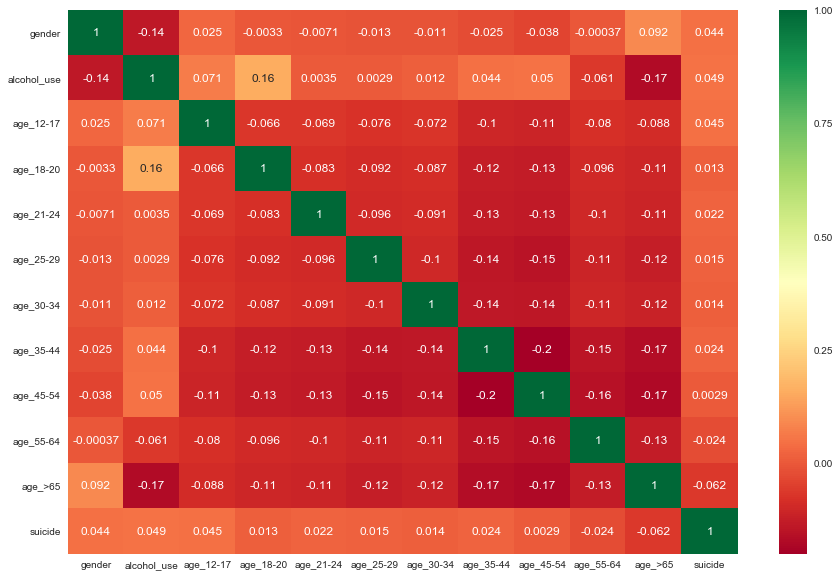

In [18]:
#correlation between variables of the dummied data
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

#get correlations of each features in dataset
corrmat = model_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,10))
#plot heat map
g=sns.heatmap(model_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
print("Heat map shows that there is a weak correlation between indepedant variables. Hence, no multicollinearity problem")
print("But there is weak correlation between independant and target variable which might affect our logistic model")

# There are different ways to tackle the problem of imbalanced dataset.
# Sampling of the data
# Using evaluation metrics such as precision, recall and f1 instead of just accuracy
# Using other models such as random forest which can make random subsamples of the data and average better predicting decision trees

# Sampling: Three random manually undersampled datasets to verify the results of logistic regression

In [73]:
###Manual Undersampled data first time
import numpy as np

np.random.seed(20)
number_of_suicides = len(model_data[model_data['suicide'] == 1])
non_suicides = model_data[model_data.suicide == 0].index
random_indices = np.random.choice(non_suicides,number_of_suicides, replace=False)

suicide_indices = model_data[model_data.suicide == 1].index

under_sample_indices = np.concatenate([suicide_indices,random_indices])
under_sample = model_data.loc[under_sample_indices]
print(len(under_sample[under_sample.suicide==0]))

#####undersampled second time 
np.random.seed(200)
number_of_suicides1 = len(model_data[model_data['suicide'] == 1])
non_suicides1 = model_data[model_data.suicide == 0].index
random_indices1 = np.random.choice(non_suicides1,number_of_suicides1, replace=False)

suicide_indices1 = model_data[model_data.suicide == 1].index

under_sample_indices1 = np.concatenate([suicide_indices1,random_indices1])
under_sample1 = model_data.loc[under_sample_indices1]
print(len(under_sample1[under_sample1.suicide==0]))


####undersampled third time
np.random.seed(150)
number_of_suicides2 = len(model_data[model_data['suicide'] == 1])
non_suicides2 = model_data[model_data.suicide == 0].index
random_indices2 = np.random.choice(non_suicides2,number_of_suicides2, replace=False)
suicide_indices2 = model_data[model_data.suicide == 1].index

under_sample_indices2 = np.concatenate([suicide_indices2,random_indices2])
under_sample2 = model_data.loc[under_sample_indices2]
print(len(under_sample2[under_sample2.suicide==0]))

9028
9028
9028


In [74]:
####Splitting undersized sample
#under sized sample1
under_sample_x = under_sample.iloc[:,0:11]  #independent columns
under_sample_y= under_sample.iloc[:,-1] #dependant column

#under sized sample2
under_sample_x1 = under_sample1.iloc[:,0:11]  #independent columns
under_sample_y1= under_sample1.iloc[:,-1] #dependant column

#under sized sample3
under_sample_x2 = under_sample2.iloc[:,0:11]  #independent columns
under_sample_y2= under_sample2.iloc[:,-1] #dependant column


# Oversampling of data using imblearn

In [75]:
###### random UPSAMPLING OF THE UPSAMPLING OF MINORITY CLASS I.E., 'SUICIDES' 

#!pip install --user imblearn
sys.path.append("/users/bhavani/appdata/roaming/python/python36/site-packages")
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_up_train, y_up_train = smt.fit_sample(X_train, y_train)

# Logistic Regression class to build classifier for multiple down/upsampled datasets using object-oriented paradigm of python

In [69]:
###Logistic Regression

class logistic_regression:
    #training logistic regression model
    def __init__(self,indepedent_variables, dependent_variables, split_size):
        self.indepedent_variables=indepedent_variables
        self.dependent_variables=dependent_variables
        self.split_size=split_size
        self.X_train8, self.X_test8, self.y_train8, self.y_test8 = train_test_split(self.indepedent_variables,
                                                            self.dependent_variables, test_size=self.split_size, random_state=0)
    def logregression(self):
        logreg = LogisticRegression()
        logreg.fit(self.X_train8, self.y_train8)
        return logreg
    def pred_log_reg(self):
        lr = self.logregression()
        self.y_balanced_pred =lr.predict(X_test)
        print("recall score", recall_score(y_test,self.y_balanced_pred))
        print("accuracy score", accuracy_score(y_test,self.y_balanced_pred))
        print(classification_report(y_test, self.y_balanced_pred))
        Roc_auc = roc_auc_score(y_test, self.y_balanced_pred)
        fpr, tpr, thresholds = roc_curve(y_test, self.y_balanced_pred)
        plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % Roc_auc)
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve')
        plt.legend(loc="lower right")
        plt.savefig('ROC_curve')
        plt.show()
        return self.y_balanced_pred
    
    #confusion matrix
    def conf_mat(self):
        confusion_matrix_value = confusion_matrix(y_test,self.y_balanced_pred)
        sns.set(font_scale=1.4)
        print(confusion_matrix_value)

# Logisitic regression on non-sampled data

Classification report for unbalanced data: 


C:\Users\Bhavani\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


recall score 0.0
accuracy score 0.9595158779803035
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     65960
           1       0.00      0.00      0.00      2783

   micro avg       0.96      0.96      0.96     68743
   macro avg       0.48      0.50      0.49     68743
weighted avg       0.92      0.96      0.94     68743



C:\Users\Bhavani\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bhavani\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bhavani\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


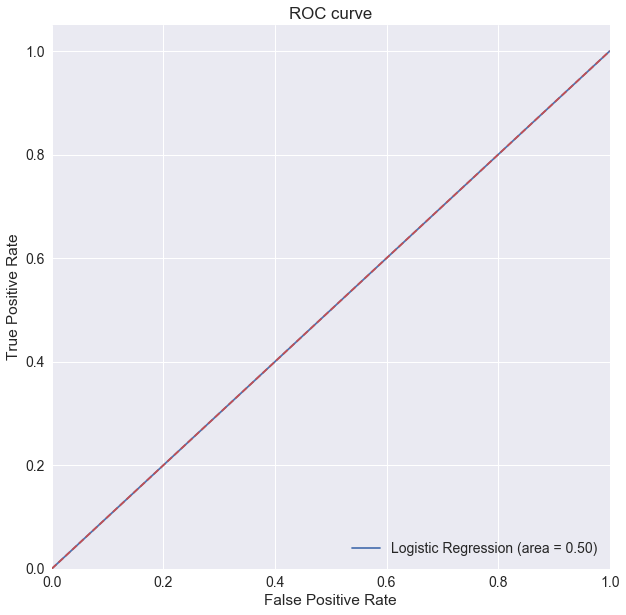

Confusion matrix for unbalanced data: 
[[65960     0]
 [ 2783     0]]
Report shows that the model predicts only non-suicide cases i.e., '0' which is the majority class in the dataset


In [62]:
# Fitting the data into the model
log_1=logistic_regression(mod_x, mod_y, 0.3)
print("Classification report for unbalanced data: ")
log_under=log_1.pred_log_reg()
# Confusion matrix of the model

print("Confusion matrix for unbalanced data: ")
log_1.conf_mat()
print("Report shows that the model predicts only non-suicide cases i.e., '0' which is the majority class in the dataset")

# Logistic regression of undersampled and upsampled data
# AUROC is used for evaluation as the dataset is highly imbalanced to account for precision and recall instead of just accuracy

# Precision %: shows the % of correct cases in the total number of suicide cases the model has predicted. TP/TP+FP
# Recall %: shows the % of suicide cases the model can predict out of 100 suicide cases in the dataset. TP/TP+FN.
# There are the cases where tradeoff is made between precision and recall by the decision makers. For example: If I don't want to miss any suicide case and amount for followup of a patient is minimal, then recall would be preferred than precision.

In [82]:
# Running the logistic regression model on Undersampled data
log_r=logistic_regression(under_sample_x, under_sample_y, 0.3)
log_r1=logistic_regression(under_sample_x1, under_sample_y1, 0.3)
log_r2=logistic_regression(under_sample_x2, under_sample_y2, 0.3)


Classification report for first under sampled data: 
recall score 0.6981674452030183
accuracy score 0.5443899742519238


C:\Users\Bhavani\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.98      0.54      0.69     65960
           1       0.06      0.70      0.11      2783

   micro avg       0.54      0.54      0.54     68743
   macro avg       0.52      0.62      0.40     68743
weighted avg       0.94      0.54      0.67     68743



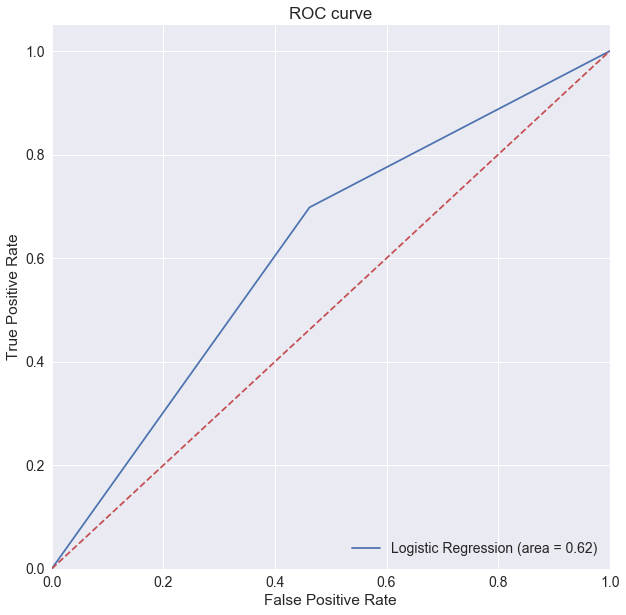



Classification report for second under sampled data
recall score 0.6981674452030183
accuracy score 0.5443899742519238


C:\Users\Bhavani\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.98      0.54      0.69     65960
           1       0.06      0.70      0.11      2783

   micro avg       0.54      0.54      0.54     68743
   macro avg       0.52      0.62      0.40     68743
weighted avg       0.94      0.54      0.67     68743



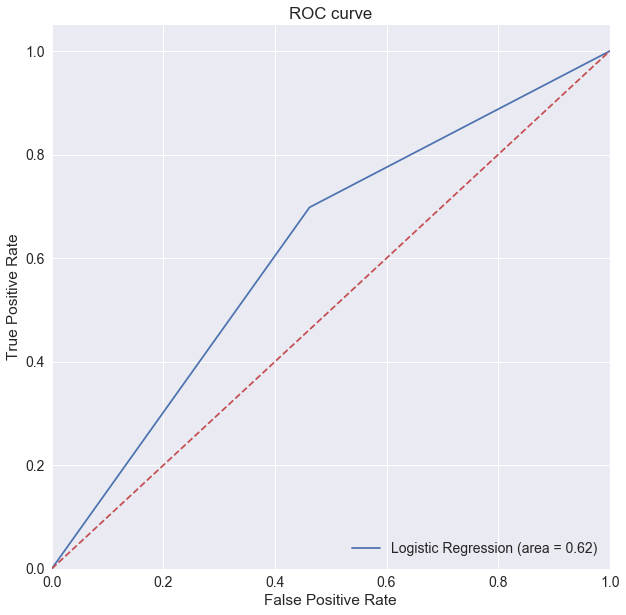



Classification report for third under sampled data
recall score 0.6981674452030183
accuracy score 0.5443899742519238


C:\Users\Bhavani\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.98      0.54      0.69     65960
           1       0.06      0.70      0.11      2783

   micro avg       0.54      0.54      0.54     68743
   macro avg       0.52      0.62      0.40     68743
weighted avg       0.94      0.54      0.67     68743



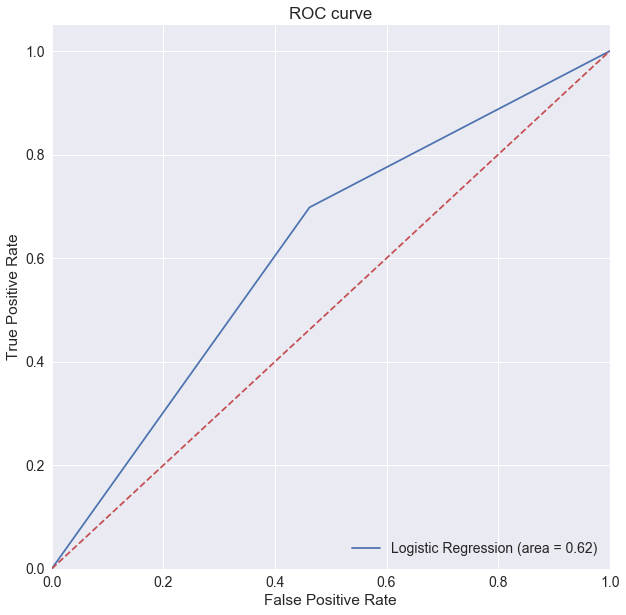

In [84]:
print("Classification report for first under sampled data: ")
log_under=log_r.pred_log_reg()
print("\n")
print("Classification report for second under sampled data")
log_under1=log_r1.pred_log_reg()
print("\n")

print("Classification report for third under sampled data")
log_under2=log_r2.pred_log_reg()

In [85]:
print("Confusion matrix for first under sampled data: ")
log_r.conf_mat()
print("\n")
print("Confusion matrix for second under sampled data")
log_r1.conf_mat()
print("\n")

print("Confusion matrix for third under sampled data")
log_r2.conf_mat()

Confusion matrix for first under sampled data: 
[[35480 30480]
 [  840  1943]]


Confusion matrix for second under sampled data
[[35480 30480]
 [  840  1943]]


Confusion matrix for third under sampled data
[[35480 30480]
 [  840  1943]]


In [76]:
#over sampled logistic regression
over_log_reg=LogisticRegression()
over_log_reg.fit(X_up_train, y_up_train)
over_pred_vals=over_log_reg.predict(X_test)
print("Results of model on oversampled data: \n", classification_report(y_test, over_pred_vals))

C:\Users\Bhavani\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Results of model on oversampled data: 
               precision    recall  f1-score   support

           0       0.98      0.54      0.69     65960
           1       0.06      0.70      0.11      2783

   micro avg       0.54      0.54      0.54     68743
   macro avg       0.52      0.62      0.40     68743
weighted avg       0.94      0.54      0.67     68743



In [77]:
#over sampled logistic regression
columns=['gender','alcohol_use','12-17','18-20','21-24', '25-29','30-34','35-44',
        '45-54','55-64','>65']
over_log_reg=LogisticRegression()
over_log_reg.fit(X_up_train, y_up_train)
coefs=over_log_reg.coef_
coefs_with_columns=sorted(zip(coefs[0],columns), reverse=True)
feature_weights=pd.DataFrame(coefs_with_columns, columns=['weights','features'])
print(feature_weights)
over_train_pred=over_log_reg.predict(X_up_train)
over_pred_vals=over_log_reg.predict(X_test)
print(classification_report(y_test, over_pred_vals))
confusion_matrix_value = confusion_matrix(y_test,over_pred_vals)
sns.set(font_scale=1.4)
print("confusion matrix of oversampled data: \n", confusion_matrix_value)

C:\Users\Bhavani\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


     weights     features
0   4.070564        12-17
1   3.753867        21-24
2   3.630522        25-29
3   3.616637        35-44
4   3.607927        30-34
5   3.512807        18-20
6   3.396688        45-54
7   2.973390        55-64
8   1.664524          >65
9   0.512556       gender
10  0.448499  alcohol_use
              precision    recall  f1-score   support

           0       0.98      0.54      0.69     65960
           1       0.06      0.70      0.11      2783

   micro avg       0.54      0.54      0.54     68743
   macro avg       0.52      0.62      0.40     68743
weighted avg       0.94      0.54      0.67     68743

confusion matrix of oversampled data: 
 [[35480 30480]
 [  840  1943]]


# The features choosen in the dataset are very less. Hence, there wasn't much feature engineering performed. But, still univariate method is performed here to check the weights assigned to features
# Dimensionality reduction techniques such as PCA can be used for feature engineering for the dataset with high dimensions (features)

# Feature Engineering of Up-sampled data and logistic regression

In [89]:
###### Checking if feature removal might increase accuracy (feature engineering) 
##random upsampling using smote
###smote upsampling minority class i.e., suicides
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train8_1=X_train.iloc[:,[0,1,2,4,5,7,9,10]]
X_test8_1=X_test.iloc[:,[0,1,2,4,5,7,9,10]]
X_train_mod8_1, y_train_mod8_1 = smt.fit_sample(X_train8_1, y_train)

In [90]:
#over sampled logistic regression after removing less weight features
columns=['gender','alcohol_use','12-17','21-24', '25-29','35-44',
        '55-64','>65']
over_log_reg1=LogisticRegression()
over_log_reg1.fit(X_train_mod8_1, y_train_mod8_1)
coefs1=over_log_reg1.coef_
coefs_with_columns1=sorted(zip(coefs1[0],columns), reverse=True)
feature_weights1=pd.DataFrame(coefs_with_columns1, columns=['weights','features'])
print(feature_weights1)
over_pred_vals1=over_log_reg1.predict(X_test8_1)
print(classification_report(y_test, over_pred_vals1))

C:\Users\Bhavani\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    weights     features
0  0.726479        12-17
1  0.521417  alcohol_use
2  0.514450       gender
3  0.420907        21-24
4  0.276763        25-29
5  0.242984        35-44
6 -0.373292        55-64
7 -1.660062          >65
              precision    recall  f1-score   support

           0       0.98      0.51      0.67     65960
           1       0.06      0.70      0.11      2783

   micro avg       0.52      0.52      0.52     68743
   macro avg       0.52      0.61      0.39     68743
weighted avg       0.94      0.52      0.65     68743



In [91]:
confusion_matrix_value = confusion_matrix(y_test,over_pred_vals1)
sns.set(font_scale=1.4)
print("confusion matrix of oversampled data: \n", confusion_matrix_value)

confusion matrix of oversampled data: 
 [[33924 32036]
 [  840  1943]]


In [92]:
over_under_pred=pd.DataFrame({'log_under':log_under, 'log_under1':log_under1, 'log_under2':log_under2, 'log_over':over_pred_vals})

# Roc curves of balanced data

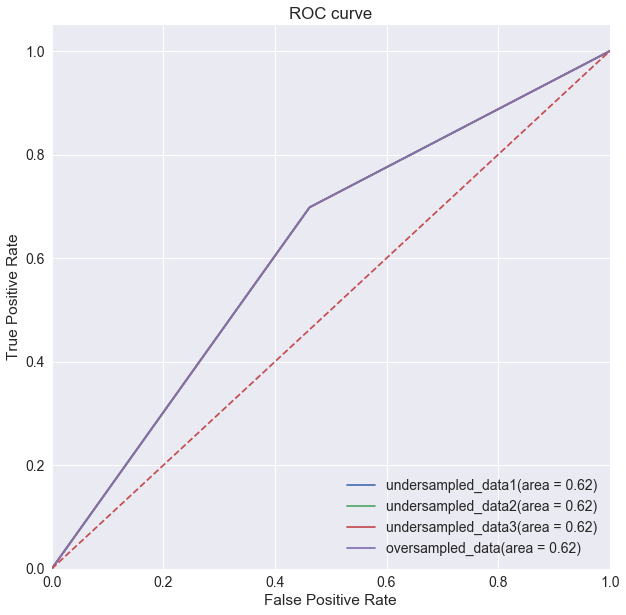

In [93]:
labels=["undersampled_data1","undersampled_data2", "undersampled_data3", "oversampled_data"]
from sklearn.metrics import roc_curve
for i in range(4):
    Roc_auc = roc_auc_score(y_test, over_under_pred.iloc[:,i])
    fpr, tpr, thresholds = roc_curve(y_test, over_under_pred.iloc[:,i])
    plt.plot(fpr, tpr, label=labels[i]+'(area = %0.2f)' % Roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.savefig('ROC_curve')
plt.show()

# Random Forest Model
# Random forest doesn't improve after 20 decision trees/estimators which can be seen in the results from random forest with 200 estimators

In [57]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=20, class_weight="balanced")

RF1 = RandomForestClassifier(n_estimators=200, class_weight="balanced")

RF.fit(X_train,y_train)
RF1.fit(X_up_train,y_up_train)
data_y_pred = RF.predict(X_test)
data_y_pred1 = RF1.predict(X_test)

print("Random forest with 20 estimators: \n ",classification_report(y_test, data_y_pred))
print("Random forest with 200 estimators: \n ", classification_report(y_test, data_y_pred1))


Random forest with 20 estimators: 
                precision    recall  f1-score   support

           0       0.98      0.60      0.74     65960
           1       0.07      0.67      0.12      2783

   micro avg       0.60      0.60      0.60     68743
   macro avg       0.52      0.63      0.43     68743
weighted avg       0.94      0.60      0.72     68743

Random forest with 200 estimators: 
                precision    recall  f1-score   support

           0       0.98      0.60      0.74     65960
           1       0.07      0.67      0.12      2783

   micro avg       0.60      0.60      0.60     68743
   macro avg       0.52      0.63      0.43     68743
weighted avg       0.94      0.60      0.72     68743



# The linear models such as logistic regression and also random forest didn't give good results
# I just want to check if the data is linearly demarcated. Methods such as convex hull can be used but models such as svm can also help to verify this

# Non-linear SVM is used because of having less features

In [141]:
##Non-linear SVM on upsampled data
from sklearn import svm
svm_clf = svm.NuSVC()
svm_clf.fit(X_up_train, y_up_train)
svm_pred=svm_clf.predict(X_test)
print(classification_report(y_test, svm_pred))


/home/students/bhavagni/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.96      0.43      0.60     62776
           1       0.05      0.63      0.08      2695

   micro avg       0.44      0.44      0.44     65471
   macro avg       0.50      0.53      0.34     65471
weighted avg       0.93      0.44      0.58     65471



# The poor results of svm indicate the linearity/non-linearity of data  is not the problem of the models
# Because even if the data is linearly/non-linearly distributed the non-linear svm would give good results. Just takes more time than linear svm

In [ ]:
random_svm=pd.DataFrame({'NonLinear_SVM':svm_pred,'random_forest20':data_y_pred1,'random_forest200':data_y_pred})

In [166]:
random_svm.head()

,NonLinear_SVM,random_forest20,random_forest200
0,1,1,1
1,1,0,0
2,0,0,0
3,0,1,1
4,1,0,0


# ROC Curves of the models

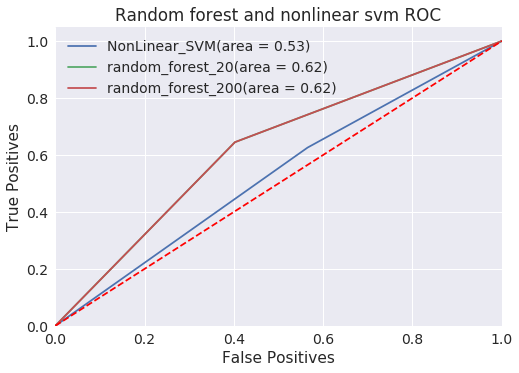

In [190]:

rforest_svm_labels=["NonLinear_SVM", "random_forest_20","random_forest_200"]
from sklearn.metrics import roc_curve
for i in range(3):
    Roc_auc = roc_auc_score(y_test, random_svm.iloc[:,i])
    fpr, tpr, thresholds = roc_curve(y_test, random_svm.iloc[:,i])
    plt.plot(fpr, tpr, label=rforest_svm_labels[i]+'(area = %0.2f)' % Roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random forest and nonlinear svm ROC')
plt.legend(loc="best")
plt.savefig('ROC_curve')
plt.show()

# After all this evaluations, it seems the weak correlation between independant and dependant variable is having significant affect on results of the models
# There are other aspects such as overfitting or underfitting which can be tested by checking accuracy results on train set and comparing train set accuracy and validation set accuracy respectively
# The next approach would be to build a neural network with appropriate weights to get better results